In [1]:
#Import the necessary libraries
import cv2
import matplotlib.pyplot as plt
from colorthief import ColorThief
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline

Original image shape is  (768, 1024, 3)
Image type is  <class 'numpy.ndarray'>
Pixels shape is  (19200, 3)
New image shape  (120, 160, 3)


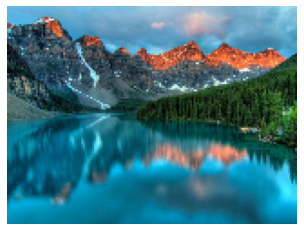

In [2]:
#Printing Image shape,type, and pixels 
image_path = "/Users/salahkaf/Desktop/Nature.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print("Original image shape is ", image.shape)
r, c = image.shape[:2]
out_r = 120
image = cv2.resize(image, (int(out_r*float(c)/r), out_r))
print("Image type is ", type(image))
pixels = image.reshape((-1, 3))
print("Pixels shape is ", pixels.shape)
print("New image shape ", image.shape)
plt.axis("off")
plt.imshow(image)

## Most Dominant Colors

The dominant colors are


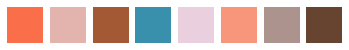

In [3]:
#Using KMeans clustering 
km = KMeans(n_clusters=8)
km.fit(pixels)
colors = np.asarray(km.cluster_centers_, dtype='uint8')
percentage = np.asarray(np.unique(km.labels_, return_counts = True)[1], dtype='float32')
percentage = percentage/pixels.shape[0]
#Plotting the most used colors in the image
print("The dominant colors are")
plt.figure(0)
for ix in range(colors.shape[0]):
    patch = np.ones((20, 20, 3))
    patch[:, :, :] = 255 - colors[ix]
    plt.subplot(1, colors.shape[0], ix+1)
    plt.axis('off')
    plt.imshow(patch.astype('uint8'))

## Most Dominant Color 

The rgb value is  (35, 102, 120)
the most dominant color is


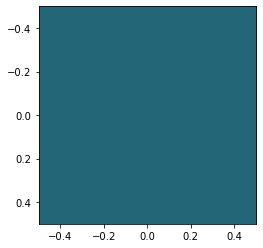

In [4]:
#Plotting the most dominint color in the image
color_thief = ColorThief(image_path)
# get the dominant color
dominant_color = color_thief.get_color(quality=1)
plt.imshow([[(dominant_color)]])
print("The rgb value is ", dominant_color)
print("the most dominant color is")